# Introdução


## Modelo de Ising

<div class="alert alert-dark">
<b>Entendendo modelo de Ising</b>
    
    - Oferece uma descrição de momento magnetico nuclear (spins) de dois estados +1 ou -1.
    
    - Queremos utilizar o modelo de Ising para estudar as transições de fase e simulações de monte carlo.
    
</div>

Pensando no spin como o momento magnético do sistema é esperado que situações em que os spins estejam todos alinhados correspondam ao máximo e minímo de magnetização.

**(ADICIONAR AQUI DISCUSSÃO SOBRE DISTRIBUIÇÃO DE BOLTZMANN E AS ESCALAS J E $K_B T$ "COMPETIREM")**

Nesse projeto estamos estudando o modelo de Ising como um grafo plano $2$-d mas poderiamos adotar outras geometrias.

Podemos definir os possíveis estados de cada sítio como $\sigma_k = \{-1, +1\}$. Trabalhamos simplesmente com uma malha $2$-d em que cada sítio pode estar em um dos estados $\sigma_k$. 

Nesse modelo trabalhamos apenas com iterações entre os vizinhos mais próximos de cada sítio, ou seja, os que estão adjacentes à esquerda, cima, direita e abaixo.  

O hamiltoniano que descreve a energia desse sistema é então:

$$
    \hat{H} = -\frac{J}{2} \sum_{i = 1}^{L} \sum_{j = 1}^{L} s(i ,j)  \left[ S_1 + S_2 + S_3 + S_4\right] 
    \Longrightarrow
    \begin{cases}
    S_1 = s(i-1, j) \\ S_2 = s(i+1, j)\\ S_3 = s(i, j-1) \\ S_4 = s(i, j+1)
    \end{cases}
$$

Por simplicidade adotamos apenas malhas quadradas então o tamanho em $x$ e $y$ é o mesmo: $L$.



A magnetização é uma grandeza relacionada à _desordem__ do sistema de spins e é dada por 
$$ m = \frac{M}{N} = \frac{1}{N} \sum_{i = 1}^{N} \sum_{j = 1}^{N} s(i, j)$$

Dessa forma, se $T = 0$ as únicas possíbilidades de valor para $m$ são $-1$ ou $1$ (ou seja, basta olhar para um sítio para saber a configuração de toda malha). Para $T \to \infty$ as configurações podem ser mais complicadas. 


Então para uma dada temperatura $T$ a _magnetização_ média é 

$$ 
    \langle m \rangle = \langle \frac{M}{N} \rangle = \frac{1}{N} \bigg\langle \sum_{i, j}^{N} s(i, j) \bigg\rangle
$$

A probabilidade dos spins estarem em uma configuração de energia $E$ é proporcional à $e^{\beta E}$ (fator de Boltzmann). Como $\beta = \frac{1}{K_B T}$ temos que, para $J \gg K_B T$ a temperatura é baixa, a energia é alta e a probabilidade será de que poucos spins estariam opostos aos outros. Já se $K_B T \gg J$ a temperatura é alta e haverá maior desordem no sistema.

Para cada configuração $\{s(i, j)\}$ existe uma energia associada pela $\hat{H}$ e uma probabilidade dessa energia ocorrer dada por $P(E) \propto e^{\beta E}$.


Motivação para usar simulação de Monte Carlo: No cálculo $\langle m(T) \rangle$ temos que percorrer todo um espaço de estados possíveis de tamanho $2^{N^2}$. 

## Entendendo simulação de Monte Carlo

-   Definimos temperatura final desejada $T$ onde $\beta = \frac{1}{K_B T}$.
-   Escolhemos um número de passos total para dinâmica de Monte Carlo.
-   Inicializa todos spins da malha.
-   Performa dinâmica de Monte Carlo pela malha:


    -   Percorre todas as linhas e colunas da malha ou percorre sítios individuais
        aleatoriamente.
    -   Para cada sítio calcula a probabilidade flipar o spin do sítio, ou seja, 
    $P(s)$ ou $P(-s)$ onde 
        $$ P(s) = \frac{e^{\beta s M}}{e^{-\beta s M} + e^{\beta s M}}; P(-s) = \frac{e^{-\beta s M}}{e^{\beta s M} + e^{-\beta s M}}$$
        com $M = J \left[s(i-1, j)+s(i+1,j)+s(i,j-1)+s(i,j+1)\right]$

    - Se o spin mudar, atualizar o valor da magnetização atual $m$ e a energia total $E$, que são nossas
    quantidades de interesse.

-   Quando o sistema atinge equilíbrio, após $N_m$ iterações de Monte Carlo, começamos a tirar médias das quantidades. Para determinar se atingiu um ponto de equilíbrio podemos definir uma variação mínima aceitável entre alguma das grandezas como magnetização ou energia.
    

    

## ANTIGO

Energia em cada sítio depende apenas dos vizinhos e pode ser calculada inicialmente por
$$E_i = E_0  + J \cdot s(i, j) \cdot (S_1 + S_2+ S_3 + S_4)$$

A energia após uma interação de Monte Carlo é 

$$ E_f = E_0 - J\cdot s(i,j) \cdot (S_1 + S_2 + S_3 + S_4) $$

onde $E_0$ é o termo da energia que não depende do spin $s(i, j)$.

Sabemos que $P(E_i) + P(E_f) = 1$, então 

$$ P(E_i) = \frac{e^{-\beta E_i}}{e^{-\beta E_i} + e^{-\beta E_f}} \\ P(E_f) = \frac{e^{-\beta E_f}}{e^{-\beta E_f} + e^{-\beta E_f} }$$

Passando a trabalhar com probabilidade de spin ao invés de energia, definimos, assim como antes:


Probabilidade $P(s)$ de um spin $s(i, j)$ permaneça com o mesmo valor é 

$$
P(s) = \frac{e^{\beta s \hat{H}_m}}{e^{\beta s \hat{H}_m} + e^{-\beta s \hat{H}_m}}$$

Probabilidade que um spin mude é $P(-s)$ :

$$
P(-s) = \frac{e^{-\beta s \hat{H}_m}}{e^{-\beta s \hat{H}_m}  + e^{\beta s \hat{H}_m}}$$ 

# Discussão e resultados

In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

DPi = 300

file_path = "./saidas/"

In [41]:
def plot_configuration(path1):
    
    data1 = np.loadtxt(path1)

    fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor='lightgray')
    plt.style.use('default')

    font = {
            'weight' : 'bold',
            'size'   : 16}
    plt.rc('text', usetex=True)
    plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
    plt.rc('font', **font) 

    ax.imshow(data1, cmap='coolwarm', interpolation='nearest')
    # plt.colorbar()
    return fig

## Tarefa A - Dinâmica de Monte Carlo

In [42]:
files_confs = [
    "saidas/tarefa-1/saida-tarefa-A1-conf-L60.dat"
    ,"saidas/tarefa-1/saida-tarefa-A2-conf-L60.dat"
    ,"saidas/tarefa-1/saida-tarefa-A1-conf-L100.dat"
    ,"saidas/tarefa-1/saida-tarefa-A2-conf-L100.dat"]

files_engs = ["saidas/tarefa-1/saida-tarefa-A1-energia-L60.dat"
,"saidas/tarefa-1/saida-tarefa-A1-energia-L100.dat"
,"saidas/tarefa-1/saida-tarefa-A2-energia-L60.dat"
,"saidas/tarefa-1/saida-tarefa-A2-energia-L100.dat"]


graphs_confs = ["graficos/tarefa-1/graf-tarefa-A1-conf-L60.png"
,"graficos/tarefa-1/graf-tarefa-A1-conf-L100.png"
,"graficos/tarefa-1/graf-tarefa-A2-conf-L60.png"
,"graficos/tarefa-1/graf-tarefa-A2-conf-L100.png"]

graphs_engs = ["graficos/tarefa-1/graf-tarefa-A1-energia-L60.png"
,"graficos/tarefa-1/graf-tarefa-A1-energia-L100.png"
,"graficos/tarefa-1/graf-tarefa-A2-energia-L60.png"
,"graficos/tarefa-1/graf-tarefa-A2-energia-L100.png"]


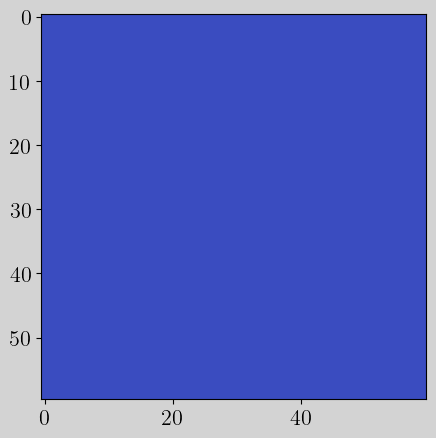

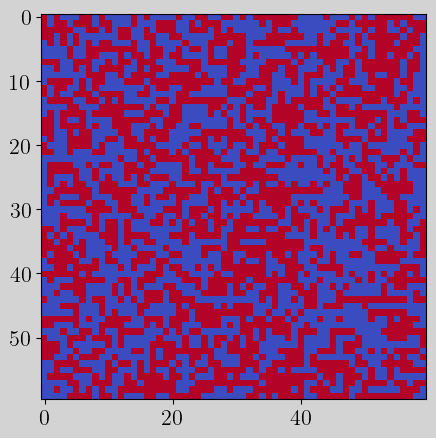

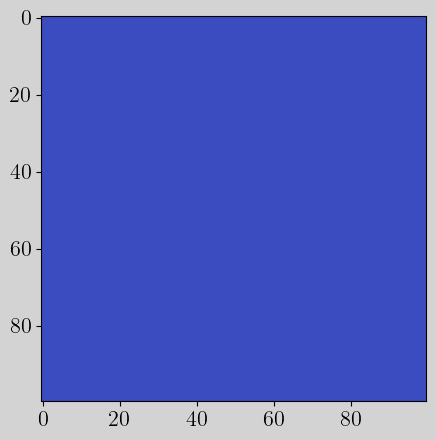

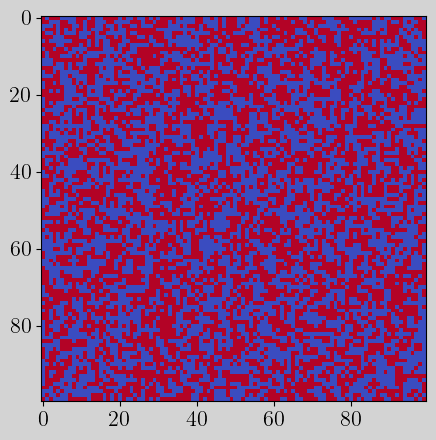

In [43]:
for out_file, graph_file  in zip(files_confs, graphs_confs):
    fig = plot_configuration(out_file)
    plt.savefig(graph_file, dpi = DPi, bbox_inches = 'tight')
    plt.show()

In [44]:
#for out_file, graph_file  in zip(files_engs, graphs_engs):
#    print("out_file = ", out_file)
#    fig = plot_configuration(out_file)
#    plt.savefig(graph_file, dpi = DPi, bbox_inches = 'tight')
#    plt.show()
#
#
#    data = np.loadtxt(out_file)
#
#    steps = data[:, 0]
#    E = data[:, 1]
#
#    fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='lightgray')
#
#    ax.set_xlabel('Iteração de Monte Carlo')
#    ax.set_ylabel('$\\langle E \\rangle$')
#    ax.plot(steps, E)
#
#    ax.set_xlim(0, 2000)
#
#    ax.grid(which = "major", linewidth = 0.5)
#    ax.grid(which = "minor", linewidth = 0.2)
#    ax.minorticks_on()


    # ax[1].grid(which = "major", linewidth = 0.5)
    # ax[1].grid(which = "minor", linewidth = 0.2)
    # ax[1].minorticks_on()

   # plt.savefig(graph_file, dpi = DPi, bbox_inches = 'tight')
   # plt.show()

## Tarefa B - Recozimento e Têmpera

### Tarefa B1


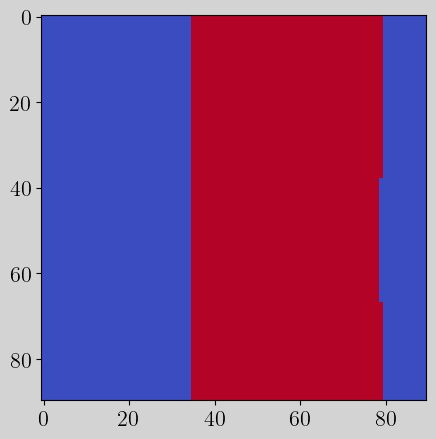

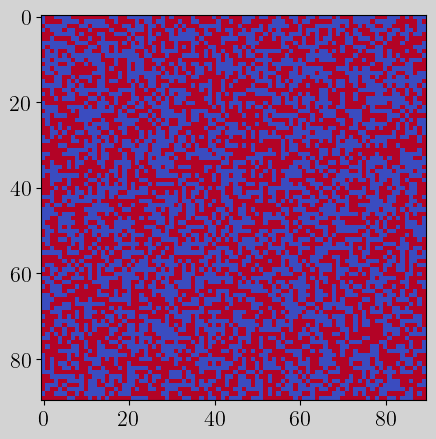

In [45]:
files_confs = ["saidas/tarefa-2/saida-tarefa-B1-conf-final.dat",
"saidas/tarefa-2/saida-tarefa-B1-conf-inicial.dat"]

graphs_confs = ["graficos/tarefa-2/graf-tarefa-B1-conf-final.png",
"graficos/tarefa-2/graf-tarefa-B1-conf-inicial.png"]

for out_file, graph_file  in zip(files_confs, graphs_confs):
    fig = plot_configuration(out_file)
    plt.savefig(graph_file, dpi = DPi, bbox_inches = 'tight')
    plt.show()

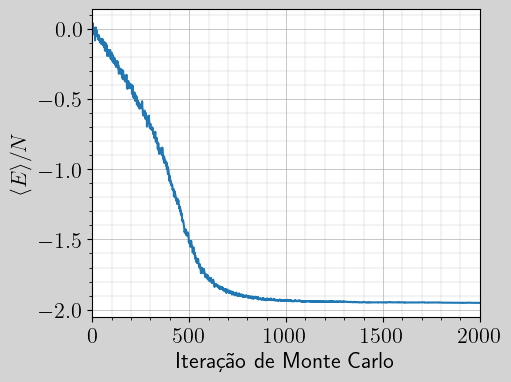

In [46]:
data = np.loadtxt("saidas/tarefa-2/saida-tarefa-B1-mag-eng.dat")

steps = data[:, 0]
mag = data[:, 1]
E = data[:, 2]

fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='lightgray')

ax.set_xlabel('Iteração de Monte Carlo')
ax.set_ylabel('$\\langle E \\rangle / N$')
ax.plot(steps, E)

ax.set_xlim(0, 2000)

ax.grid(which = "major", linewidth = 0.5)
ax.grid(which = "minor", linewidth = 0.2)
ax.minorticks_on()

plt.savefig("graficos/tarefa-2/graf-tarefa-B1-mag-eng.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

### Tarefa B2

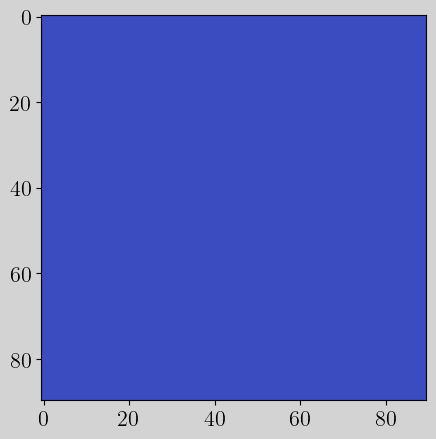

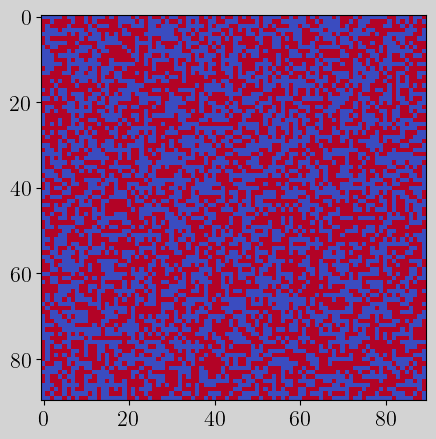

In [47]:
files_confs = ["saidas/tarefa-2/saida-tarefa-B2-conf-final.dat"
,"saidas/tarefa-2/saida-tarefa-B2-conf-inicial.dat"]

graphs_confs = ["graficos/tarefa-2/graf-tarefa-B2-conf-final.png"
,"graficos/tarefa-2/graf-tarefa-B2-conf-inicial.png"]

for out_file, graph_file  in zip(files_confs, graphs_confs):
    fig = plot_configuration(out_file)
    plt.savefig(graph_file, dpi = DPi, bbox_inches = 'tight')
    plt.show()

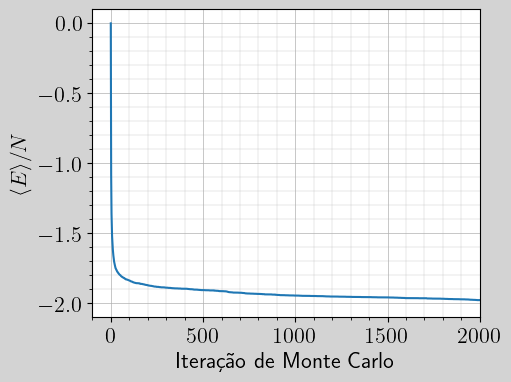

In [48]:
data = np.loadtxt("saidas/tarefa-2/saida-tarefa-B2-mag-eng.dat")

steps = data[:, 0]
mag = data[:, 1]
E = data[:, 2]

fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='lightgray')

ax.set_xlabel('Iteração de Monte Carlo')
ax.set_ylabel('$\\langle E \\rangle/N$')
ax.plot(steps, E)

ax.set_xlim(-100, 2000)

ax.grid(which = "major", linewidth = 0.5)
ax.grid(which = "minor", linewidth = 0.2)
ax.minorticks_on()

plt.savefig("graficos/tarefa-2/graf-tarefa-B2-mag-eng.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

## Tarefa C - Loop térmico

### Tarefa C1

In [49]:
output_files_db2 = ["saidas/tarefa-3/saida-tarefa-C1-L60-DB2.dat"
,"saidas/tarefa-3/saida-tarefa-C1-L80-DB2.dat"
,"saidas/tarefa-3/saida-tarefa-C1-L100-DB2.dat"]

output_files_db1 = ["saidas/tarefa-3/saida-tarefa-C1-L60-DB1.dat"
,"saidas/tarefa-3/saida-tarefa-C1-L80-DB1.dat"
,"saidas/tarefa-3/saida-tarefa-C1-L100-DB1.dat"]

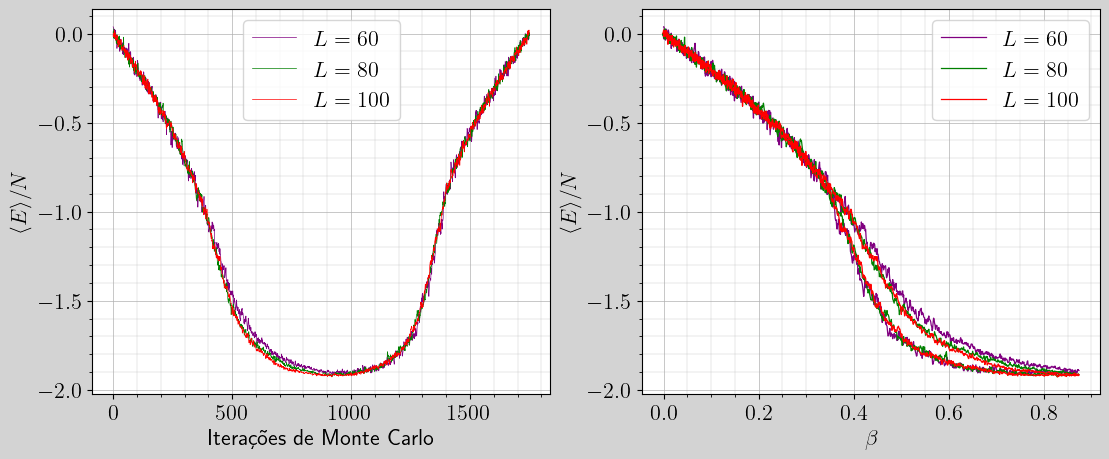

In [50]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), facecolor="lightgray")

for file, L, color in zip(output_files_db1, [60, 80, 100], ["purple", "green", "red"]):

    data = np.loadtxt(file)

    steps = data[:, 0]
    beta = data[:, 1]
    mag = data[:, 2]
    energy = data[:, 3]


    ax[0].set_ylabel("$\\langle E \\rangle/N$")
    ax[1].set_ylabel("$\\langle E \\rangle/N$")

    ax[0].set_xlabel("Iterações de Monte Carlo")
    ax[0].plot(steps, energy, linewidth = 0.5, color = color, label = f"$L = {L}$")   

    ax[0].grid(which = "major", linewidth = 0.5)
    ax[0].grid(which = "minor", linewidth = 0.2)
    ax[0].minorticks_on()

    ax[1].set_xlabel("$\\beta$")
    ax[1].plot(beta, energy, linewidth = 0.9, color = color, label = f"$L = {L}$")

    ax[1].grid(which = "major", linewidth = 0.5)
    ax[1].grid(which = "minor", linewidth = 0.2)
    ax[1].minorticks_on()
    
ax[0].legend()
ax[1].legend()
font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 
plt.savefig("graficos/tarefa-3/graf-tarefa-C1-delta1.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

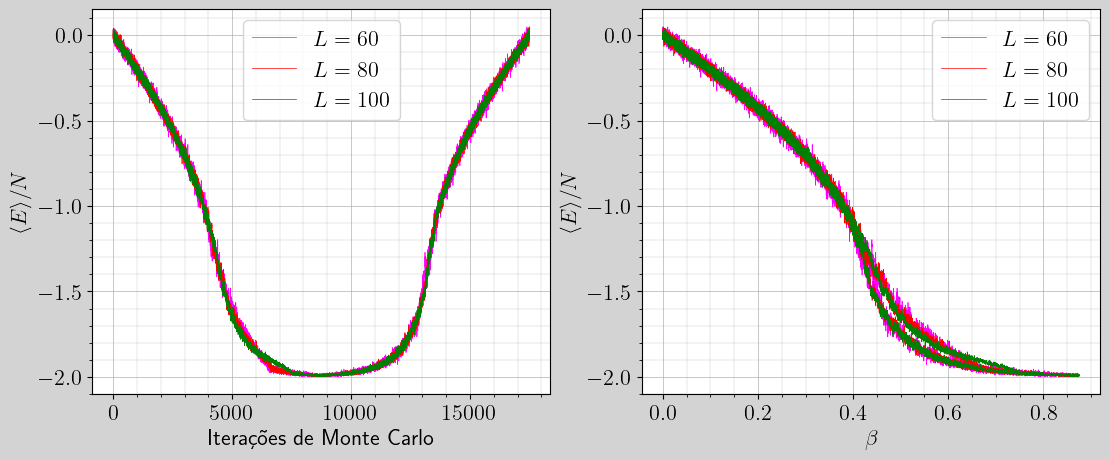

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), facecolor="lightgray")

for file, L, color, in zip(output_files_db2, [60, 80, 100], ["magenta", "red", "green"]):

    data = np.loadtxt(file)

    steps = data[:, 0]
    beta = data[:, 1]
    mag = data[:, 2]
    energy = data[:, 3]


    ax[0].set_ylabel("$\\langle E \\rangle/N$")
    ax[1].set_ylabel("$\\langle E \\rangle/N$")

    ax[0].set_xlabel("Iterações de Monte Carlo")
    ax[0].plot(steps, energy, linewidth = 0.5,  color = color, label = f"$L = {L}$")   

    ax[0].grid(which = "major", linewidth = 0.5)
    ax[0].grid(which = "minor", linewidth = 0.2)
    ax[0].minorticks_on()

    ax[1].set_xlabel("$\\beta$")
    ax[1].plot(beta, energy, linewidth = 0.5, color = color, label = f"$L = {L}$")

    ax[1].grid(which = "major", linewidth = 0.5)
    ax[1].grid(which = "minor", linewidth = 0.2)
    ax[1].minorticks_on()
    
ax[0].legend()
ax[1].legend()

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 

plt.savefig("graficos/tarefa-3/graf-tarefa-C1-delta2.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

### Tarefa C2


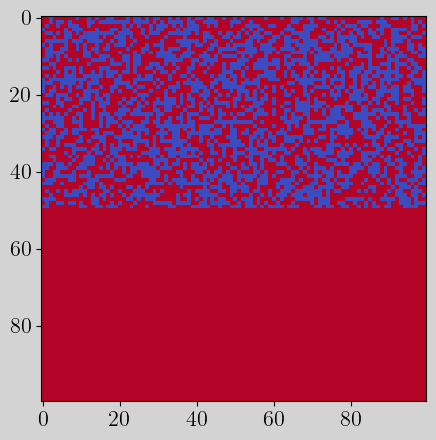

In [52]:
output_conf = "saidas/tarefa-3/saida-tarefa-C2-conf.dat"
fig = plot_configuration(output_conf)
plt.savefig("graficos/tarefa-3/graf-tarefa-C2-conf.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

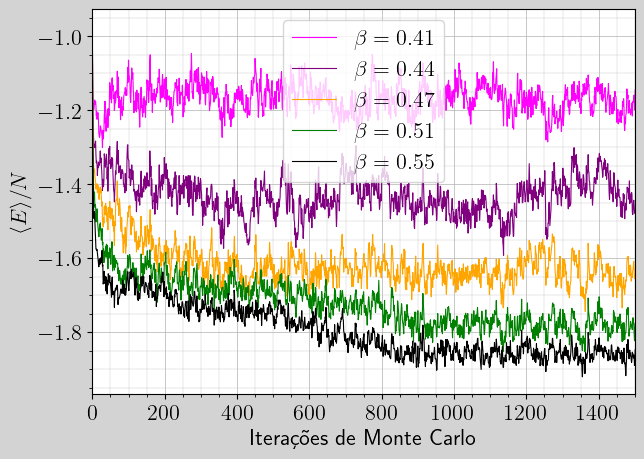

In [53]:
output_files = [
     "saidas/tarefa-3/saida-tarefa-C2-L60-b1.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L60-b2.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L60-b3.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L60-b4.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L60-b5.dat"]

colors = ["magenta", "purple", "orange", "green", "black"]

fig, ax = plt.subplots(1, 1, figsize=(7, 5), facecolor="lightgray")

for file, beta, color, in zip(output_files, [0.41, 0.44, 0.47, 0.51, 0.55], colors):

    data = np.loadtxt(file)

    steps = data[:, 0]
    energy = data[:, 1]

    ax.set_ylabel("$\\langle E \\rangle/N$")
    ax.set_xlabel("Iterações de Monte Carlo")

    ax.plot(steps, energy, linewidth = 0.8,  color = color, label = f"$\\beta = {beta}$")   

    ax.grid(which = "major", linewidth = 0.5)
    ax.grid(which = "minor", linewidth = 0.2)
    ax.minorticks_on()

ax.set_xlim(0, 1500)
ax.legend()

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 


plt.savefig("graficos/tarefa-3/graf-tarefa-C2-L60.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

$$ \beta = \frac{1}{k_b T} \Rightarrow T = 1/\beta k_b$$

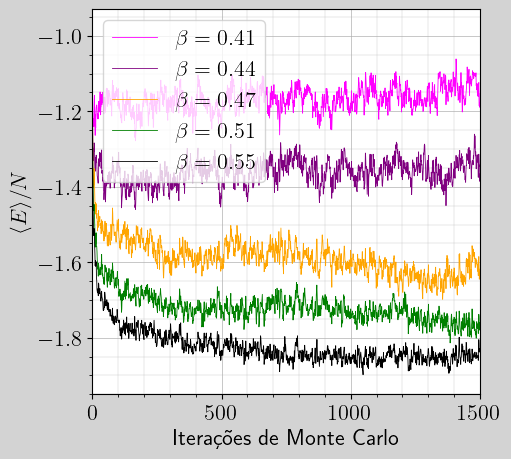

In [54]:
output_files = [
     "saidas/tarefa-3/saida-tarefa-C2-L80-b1.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L80-b2.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L80-b3.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L80-b4.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L80-b5.dat"]

colors = ["magenta", "purple", "orange", "green", "black"]


fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor="lightgray")

betas = [0.41, 0.44, 0.47, 0.51, 0.55]
for file, beta, color, in zip(output_files, betas, colors):

    data = np.loadtxt(file)

    steps = data[:, 0]
    energy = data[:, 1]
    var_energy = data[:, 2]

    ax.set_ylabel("$\\langle E \\rangle/N$")
    ax.set_xlabel("Iterações de Monte Carlo")
    ax.plot(steps, energy, linewidth = 0.6,  color = color, label = f"$\\beta = {beta}$")   
    ax.grid(which = "major", linewidth = 0.5)
    ax.grid(which = "minor", linewidth = 0.2)
    ax.minorticks_on()
    ax.set_xlim(0, 1500)
    ax.legend()



font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 

plt.savefig("graficos/tarefa-3/graf-tarefa-C2-L80.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

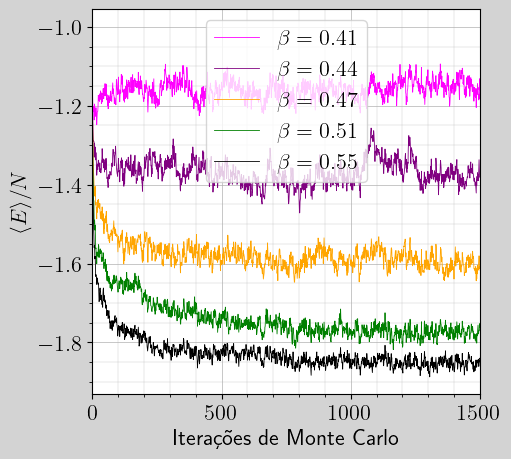

In [55]:
output_files = [
     "saidas/tarefa-3/saida-tarefa-C2-L100-b1.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L100-b2.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L100-b3.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L100-b4.dat"
    ,"saidas/tarefa-3/saida-tarefa-C2-L100-b5.dat"]

colors = ["magenta", "purple", "orange", "green", "black"]


fig, ax = plt.subplots(1, 1, figsize=(5, 5), facecolor="lightgray")

for file, beta, color, in zip(output_files, [0.41, 0.44, 0.47, 0.51, 0.55], colors):

    data = np.loadtxt(file)

    steps = data[:, 0]
    energy = data[:, 1]


    ax.set_ylabel("$\\langle E \\rangle/N$")
    ax.set_xlabel("Iterações de Monte Carlo")

    ax.plot(steps, energy, linewidth = 0.6,  color = color, label = f"$\\beta = {beta}$")   

    ax.grid(which = "major", linewidth = 0.5)
    ax.grid(which = "minor", linewidth = 0.2)
    ax.minorticks_on()

ax.set_xlim(0, 1500)
ax.legend()

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 

plt.savefig("graficos/tarefa-3/graf-tarefa-C2-L100.png", dpi = DPi, bbox_inches = 'tight')
plt.show()

## Tarefa D - Quebra espontânea de simetria

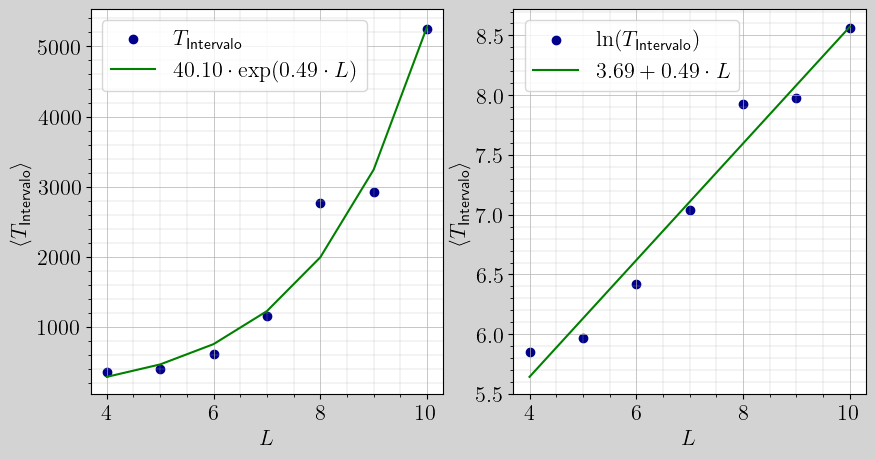

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = np.loadtxt("saidas/tarefa-4/saida-tarefa-D.dat")

L = data[:, 0]
T = data[:, 1]

x = L.reshape((-1, 1))
y = T
# Step 3: Transform the y data using the natural logarithm
log_y = np.log(y)

# Step 4: Perform linear regression on the transformed data
model = LinearRegression()
model.fit(x, log_y)

# Step 5: Transform the predictions back to the original scale
log_y_pred = model.predict(x)
y_pred = np.exp(log_y_pred)

a = model.coef_[0]
b = model.intercept_


# Step 6: Plot the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor="lightgray")

font = {
        'weight' : 'bold',
        'size'   : 16}
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', **font) 

y_pred = np.exp(b) * np.exp(a * x)
ax[0].scatter(x, y, label='$T_\\text{Intervalo}$', color='darkblue')
ax[0].plot(x, y_pred, label=f'${np.exp(b):.2f} \\cdot \\exp({a:.2f} \\cdot L)$', color='green')
ax[0].set_xlabel('$L$')
ax[0].set_ylabel('$\\langle T_\\text{Intervalo}\\rangle$')
ax[0].grid(which = "major", linewidth = 0.5)
ax[0].grid(which = "minor", linewidth = 0.2)
ax[0].minorticks_on()
ax[0].legend()
y_pred = log_y_pred
ax[1].scatter(x, np.log(y), label='$\\ln(T_\\text{Intervalo})$', color='darkblue')
ax[1].plot(x, y_pred, label=f'${b:.2f} + {a:.2f} \\cdot L$', color='green')
ax[1].set_xlabel('$L$')
ax[1].set_ylabel('$\\langle T_\\text{Intervalo}\\rangle$')
ax[1].grid(which = "major", linewidth = 0.5)
ax[1].grid(which = "minor", linewidth = 0.2)
ax[1].minorticks_on()
ax[1].legend()


plt.savefig("graficos/tarefa-4/graf-tarefa-D.png", dpi = DPi, bbox_inches = 'tight')

plt.show()
